In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
url = "..\data\delitos2021_procesados.csv"
df = pd.read_csv(url, index_col=0)
df.head()

,anio,mes,dia,fecha,franja,tipo,subtipo,uso_arma,uso_moto,barrio,comuna,latitud,longitud,cantidad
id-mapa,,,,,,,,,,,,,,
110639,2021,OCTUBRE,MIERCOLES,2021-10-06 00:00:00+00:00,0.0,Hurto,Hurto total,NO,NO,VELEZ SARSFIELD,10.0,-34.631129,-58.489377,1
110640,2021,OCTUBRE,JUEVES,2021-10-07 00:00:00+00:00,23.0,Robo,Robo total,NO,NO,VELEZ SARSFIELD,10.0,-34.624628,-58.501039,1
110641,2021,OCTUBRE,MIERCOLES,2021-10-06 00:00:00+00:00,12.0,Robo,Robo total,SI,NO,MONTE CASTRO,10.0,-34.623213,-58.510132,1
110642,2021,OCTUBRE,JUEVES,2021-10-07 00:00:00+00:00,20.0,Robo,Robo total,NO,NO,VELEZ SARSFIELD,10.0,-34.627172,-58.498928,1
110643,2021,OCTUBRE,SABADO,2021-10-09 00:00:00+00:00,11.0,Hurto,Hurto total,NO,NO,FLORESTA,10.0,-34.626978,-58.483313,1


In [3]:
df.dtypes

anio          int64
mes          object
dia          object
fecha        object
franja      float64
tipo         object
subtipo      object
uso_arma     object
uso_moto     object
barrio       object
comuna      float64
latitud     float64
longitud    float64
cantidad      int64
dtype: object

In [4]:
df["subtipo_binario"] = df["subtipo"].apply(lambda x: 1 if x in["Hurto automotor", "Robo automotor"] else 0)
df["uso_arma"] = df["uso_arma"].apply(lambda x: 1 if x in["SI"] else 0)

In [5]:
df.head()

,anio,mes,dia,fecha,franja,tipo,subtipo,uso_arma,uso_moto,barrio,comuna,latitud,longitud,cantidad,subtipo_binario
id-mapa,,,,,,,,,,,,,,,
110639,2021,OCTUBRE,MIERCOLES,2021-10-06 00:00:00+00:00,0.0,Hurto,Hurto total,0,NO,VELEZ SARSFIELD,10.0,-34.631129,-58.489377,1,0
110640,2021,OCTUBRE,JUEVES,2021-10-07 00:00:00+00:00,23.0,Robo,Robo total,0,NO,VELEZ SARSFIELD,10.0,-34.624628,-58.501039,1,0
110641,2021,OCTUBRE,MIERCOLES,2021-10-06 00:00:00+00:00,12.0,Robo,Robo total,1,NO,MONTE CASTRO,10.0,-34.623213,-58.510132,1,0
110642,2021,OCTUBRE,JUEVES,2021-10-07 00:00:00+00:00,20.0,Robo,Robo total,0,NO,VELEZ SARSFIELD,10.0,-34.627172,-58.498928,1,0
110643,2021,OCTUBRE,SABADO,2021-10-09 00:00:00+00:00,11.0,Hurto,Hurto total,0,NO,FLORESTA,10.0,-34.626978,-58.483313,1,0


In [6]:
df.subtipo_binario.value_counts()

subtipo_binario
0    103531
1      4351
Name: count, dtype: int64

In [7]:
columnas_a_eliminar =["anio","mes", "dia" , "uso_moto", "subtipo", "barrio", "latitud", "longitud", "cantidad"]
df = df.drop(columns=columnas_a_eliminar)

In [8]:
df["comuna"] = df["comuna"].astype(int)
df["franja"] = df["franja"].astype(int)

In [9]:
df["fecha"] = pd.to_datetime(df["fecha"])

df["dia"] = df["fecha"].dt.day_of_week+1
df["mes"] = df["fecha"].dt.month
df["trimestre"] = df["fecha"].dt.quarter

In [10]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
df["tipo_encoded"] = encoder.fit_transform(df["tipo"])

In [12]:
redefinicion_tipo = df.groupby('tipo')['tipo_encoded'].apply(lambda x: list(set(x))).reset_index()
print(redefinicion_tipo)

         tipo tipo_encoded
0    Amenazas          [0]
1  Homicidios          [1]
2       Hurto          [2]
3    Lesiones          [3]
4        Robo          [4]
5    Vialidad          [5]


In [13]:
columnas_a_eliminar_2 = ["fecha", "tipo"]
df = df.drop(columns = columnas_a_eliminar_2)
df.head()

,franja,uso_arma,comuna,subtipo_binario,dia,mes,trimestre,tipo_encoded
id-mapa,,,,,,,,
110639,0,0,10,0,3,10,4,2
110640,23,0,10,0,4,10,4,4
110641,12,1,10,0,3,10,4,4
110642,20,0,10,0,4,10,4,4
110643,11,0,10,0,6,10,4,2


In [14]:
df.dtypes

franja             int32
uso_arma           int64
comuna             int32
subtipo_binario    int64
dia                int32
mes                int32
trimestre          int32
tipo_encoded       int32
dtype: object

In [15]:
df.var()

franja             39.306582
uso_arma            0.071315
comuna             20.190052
subtipo_binario     0.038705
dia                 3.802238
mes                12.535954
trimestre           1.318214
tipo_encoded        1.867726
dtype: float64

In [62]:
X = df.drop(columns = ["subtipo_binario"])
y = df["subtipo_binario"]

In [63]:
print("X shape:", X.shape)
print("y shape:", y.shape)

X shape: (107882, 7)
y shape: (107882,)


In [64]:
from sklearn.feature_selection import VarianceThreshold

selector = VarianceThreshold(threshold=0.1)
X_redused = selector.fit_transform(X)

In [65]:
print("X_resampled shape:", X_redused.shape)
print("y_resampled shape:", y.shape)

X_resampled shape: (107882, 6)
y_resampled shape: (107882,)


In [66]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_redused, y, test_size = 0.2, random_state = 42)

In [67]:
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBClassifier

param_grid = {
    'n_estimators': [100, 300, 500],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.7, 0.8, 1.0]
}

xgb =XGBClassifier(scale_pos_weight=len(y[y==0]) / len(y[y==1]))
grid_search = RandomizedSearchCV(xgb, 
                                 param_distributions=param_grid, 
                                 n_iter=10,
                                 cv=3,
                                 n_jobs=-1
                                 )

grid_search.fit(X_train, y_train)

print(grid_search.best_params_)

{'subsample': 1.0, 'n_estimators': 500, 'max_depth': 7, 'learning_rate': 0.2}


In [68]:
xgb.fit(X_test, y_test)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [69]:
y_pred = xgb.predict(X_test)

In [70]:
from sklearn.metrics import confusion_matrix

print(confusion_matrix(y_test, y_pred))

[[17833  2856]
 [    3   885]]


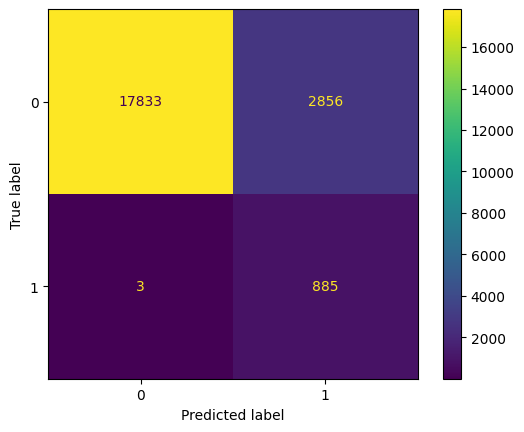

In [72]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(xgb, X_test, y_test)

In [73]:
from sklearn.metrics import classification_report, roc_auc_score

print(classification_report(y_test, y_pred))
print("Presición:", roc_auc_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.86      0.93     20689
           1       0.24      1.00      0.38       888

    accuracy                           0.87     21577
   macro avg       0.62      0.93      0.65     21577
weighted avg       0.97      0.87      0.90     21577

Presición: 0.9292886251082635
